### Základný opis dát spolu s ich charakteristikami (5b)
V tejto fáze uveďte:
- Počet záznamov, počet atribútov, ich typy,
- Pre zvolené významné atribúty ich distribúcie, základné deskriptívne štatistiky a pod.
- Párová analýza dát: preskúmajte vzťahy medzi zvolenými dvojicami atribútov.
- Párová analýza dát: Identifikujte závislostí medzi dvojicami atribútov (napr. korelácie)
- Párová analýza dát: Identifikujte závislosti medzi predikovanou premennou a ostatnými
premennými (potenciálnymi prediktormi).

In [261]:
import statsmodels.api as sm
import dateparser as dateparser
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab as py
import statsmodels.stats.api as sms

In [262]:
measurements_file = "data/measurements.csv"
measurements_data = pd.read_csv(measurements_file, sep='\t')
reduced_data = pd.read_csv(measurements_file, sep='\t')
replaced_data = pd.read_csv(measurements_file, sep='\t')


stations_file = "data/stations.csv"
stations_data = pd.read_csv(stations_file, sep='\t')

In [263]:
measurements_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12068 entries, 0 to 12067
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       12019 non-null  float64
 1   CO         12019 non-null  float64
 2   Pb         12019 non-null  float64
 3   C2H3NO5    12019 non-null  float64
 4   CFCs       12019 non-null  float64
 5   H2CO       12018 non-null  float64
 6   O3         12020 non-null  float64
 7   TEMP       12020 non-null  float64
 8   NOx        12018 non-null  float64
 9   SO2        12020 non-null  float64
 10  latitude   12068 non-null  float64
 11  longitude  12068 non-null  float64
 12  NH3        12018 non-null  float64
 13  CH4        12018 non-null  float64
 14  PRES       12068 non-null  float64
 15  PM2.5      12020 non-null  float64
 16  warning    12018 non-null  float64
 17  PAHs       12020 non-null  float64
dtypes: float64(18)
memory usage: 1.7 MB


In [264]:
stations_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1110 entries, 0 to 1109
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   QoS        1110 non-null   object 
 1   station    1110 non-null   object 
 2   code       1109 non-null   object 
 3   latitude   1110 non-null   float64
 4   longitude  1110 non-null   float64
 5   revision   1110 non-null   object 
dtypes: float64(2), object(4)
memory usage: 52.2+ KB


### PAHs

In [265]:
measurements_data['PAHs'].describe()

count    12020.000000
mean         8.033075
std          1.908858
min          1.301390
25%          6.625597
50%          8.300640
75%          9.323888
max         16.087840
Name: PAHs, dtype: float64

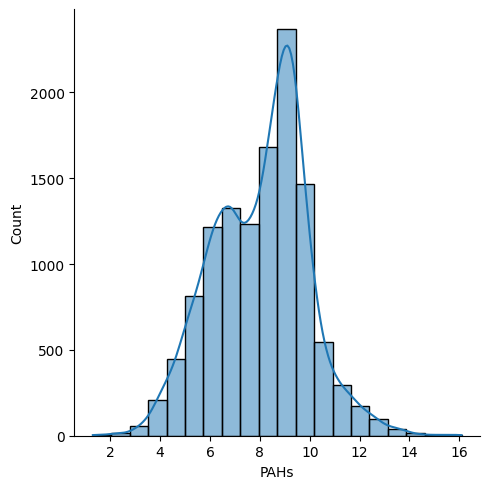

In [266]:
sns.displot(measurements_data['PAHs'], bins=20, kde=True)

<AxesSubplot: xlabel='warning', ylabel='PAHs'>

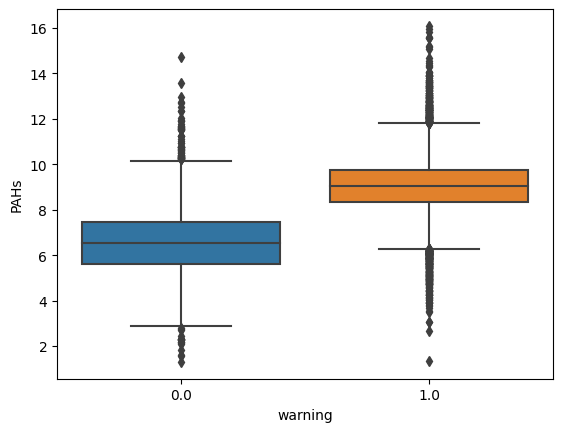

In [267]:
# sns.displot(measurements_data['PAHs'], bins=20, kde=True)
sns.boxplot(x='warning', y='PAHs', data=measurements_data)
# sns.boxplot(x='PAHs', y='warning', data=measurements_data[(measurements_data.warning == 0) | (measurements_data.warning == 1)])

<AxesSubplot: xlabel='warning', ylabel='PAHs'>

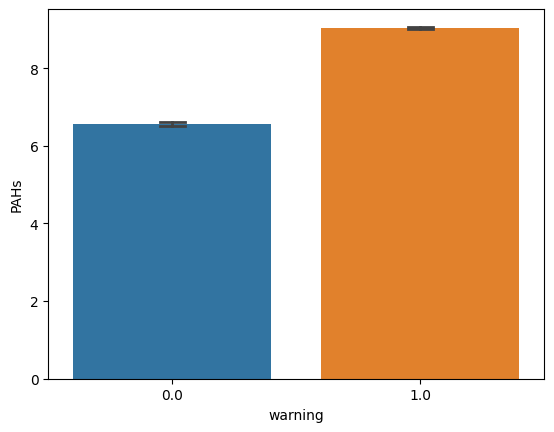

In [268]:
sns.barplot(x='warning', y='PAHs', data=measurements_data, capsize=0.1, errwidth=2)

<AxesSubplot: xlabel='PAHs', ylabel='Count'>

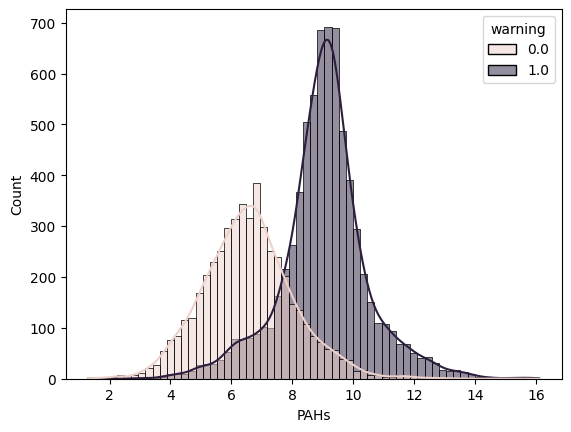

In [269]:
sns.histplot(data=measurements_data, hue='warning', x='PAHs', fill=True, kde=True)

In [270]:
df = measurements_data.corr()
df

,PM10,CO,Pb,C2H3NO5,CFCs,H2CO,O3,TEMP,NOx,SO2,latitude,longitude,NH3,CH4,PRES,PM2.5,warning,PAHs
PM10,1.000000,0.005965,0.006970,0.596622,-0.002981,0.021558,0.281797,0.014379,0.008882,0.015921,-0.005943,-0.022199,0.262519,0.019110,-0.006128,-0.020649,-0.380693,-0.121647
CO,0.005965,1.000000,0.001403,0.001544,-0.006661,-0.015373,0.008724,0.010907,0.017444,0.008453,0.015384,0.011812,-0.007878,-0.003211,-0.007426,0.018136,-0.000229,0.002141
Pb,0.006970,0.001403,1.000000,0.005078,-0.004759,0.002046,0.000234,-0.002057,0.017034,-0.000315,0.006237,-0.016354,0.000165,-0.000152,0.008143,0.004111,0.007725,0.014214
C2H3NO5,0.596622,0.001544,0.005078,1.000000,0.007241,0.006401,0.172648,0.001642,0.001940,0.014669,-0.009075,-0.009233,0.159400,-0.130238,-0.009737,0.073662,-0.113598,0.118340
CFCs,-0.002981,-0.006661,-0.004759,0.007241,1.000000,-0.004586,0.000228,0.013230,-0.012153,0.024046,0.010009,0.007687,-0.003873,0.011559,-0.016456,0.004770,-0.005642,-0.005556
H2CO,0.021558,-0.015373,0.002046,0.006401,-0.004586,1.000000,0.004980,-0.000193,-0.014848,0.010299,0.001256,-0.000307,0.000530,0.009069,-0.010413,0.005655,-0.016601,-0.013654
O3,0.281797,0.008724,0.000234,0.172648,0.000228,0.004980,1.000000,0.003339,-0.001073,0.005406,0.011011,-0.016287,0.498177,0.300042,0.006510,0.243536,-0.004746,-0.090964
TEMP,0.014379,0.010907,-0.002057,0.001642,0.013230,-0.000193,0.003339,1.000000,-0.003111,0.004682,-0.013985,0.010188,-0.000405,0.009718,0.009998,0.000185,-0.014417,-0.006714
NOx,0.008882,0.017444,0.017034,0.001940,-0.012153,-0.014848,-0.001073,-0.003111,1.000000,0.002378,-0.001709,-0.005895,-0.009432,-0.007834,-0.020807,0.003473,0.000263,0.003073
SO2,0.015921,0.008453,-0.000315,0.014669,0.024046,0.010299,0.005406,0.004682,0.002378,1.000000,-0.008079,0.003593,0.013902,0.012570,-0.016456,-0.001950,-0.009149,-0.013663


## Identifikácia problémov v dátach s prvotným riešením (5b)
- Identifikujte problémy v dátach napr.: nevhodná štruktúra dát, duplicitné záznamy, nejednotné formáty, chýbajúce hodnoty, vychýlené hodnoty. V dátach sa môžu nachádzať aj iné, tu nevymenované problémy.
- Navrhnuté riešenie problémov s dátami prvotne realizujte na dátach. Problémy s dátami môžete riešiť iteratívne v každej fáze aj vo všetkých fázach podľa Vašej potreby.

### Identifikované problémy
V dátach sme na základe testovania a filtrovania dát objavili niekoľko problémov:
1. chýbajúce hodnoty (Nan)
2. nejednotné formáty dát (napr. dátumy v stĺpci  'revisions' a stav v stĺpci 'Qos' datasetu stations.csv)
3. vychýlené hodnoty (názvy miest v stĺpci 'revisions' boli po preklade z azbuky a iných písiem a jazykov chybne preložené a naformátované)
4. duplicitné záznamy


Determinácii a riešeniu týchto problémov sa venujeme nižšie.


### 1. Chýbajúce hodnoty (Nan)
V datasetoch sme determinovali údaje s chýbajúcimi hodnotami v tvare Nan. Naskytli sa nám 2 možnosti riešenia tohto problému, pričom oba sme otestovali. V prvom rade, vymazať všetky riadky obsahujúce hodnotu Nan a tým predísť dohadom o tom, aká hodnota sa tam mala nachádzať. Druhá možnosť bola jednoducho hodnotu Nan nahradiť priemerom všetkých hodnôt v danom stĺpci. Takto by sme sa neukrátili o záznamy v iných stĺpcoch a chýbajúcu hodnotu by sme odhadli na základe priemeru.

In [271]:
reduced_data.dropna(inplace=True)
stations_data.dropna(inplace=True)      # len 1 zaznam

for col in reduced_data:
    replaced_data[col].fillna((measurements_data[col].mean()), inplace=True)


print("Percento vymazanych zaznamov: ", round(100-(100*(reduced_data.shape[0]/measurements_data.shape[0])),4), "%")

Percento vymazanych zaznamov:  5.9165 %


Percento vymazaných záznamov v prípade datasetu measurements.csv by činilo 5.9165 % a  v prípade datasetu stations.csv sa jednalo len o jediný záznam. V tabuľke nižšie je porovnanie priemerných hodnôt stĺpcov z measurements.csv bez uprav, s vymazaním riadkov s hodnotami Nan a s nahradením Nan priemernou hodnotou.

Keďže percento vymazaných záznamov sa blížilo k 5%, rozhodli sme sa zvoliť tento postup a ďalej sme pracovali s datasetom s vymazanými riadkami obsahujúcimi Nan.


In [314]:
df2 = pd.concat([measurements_data.mean(), reduced_data.mean().reindex(measurements_data.mean().index), replaced_data.mean().reindex(measurements_data.mean().index)], axis=1, keys=['Priemer', 'Priemer bez Nan', 'Priemer s nahradou'])
df2

,Priemer,Priemer bez Nan,Priemer s nahradou
PM10,8.293866,8.300632,8.293866
CO,7.782799,7.784449,7.782799
Pb,42.193993,42.156249,42.193993
C2H3NO5,1.609062,1.612638,1.609062
CFCs,49.560551,49.563606,49.560551
H2CO,47.507080,47.478730,47.507080
O3,7.770742,7.772116,7.770742
TEMP,15.171415,15.219445,15.171415
NOx,7.765296,7.769659,7.765296
SO2,7.776139,7.776889,7.776139


Na grafe vidíme, že rozdiely medzi hodnotami sú skutočne malé a miera okolo 5% je použiteľná pre dalsšiu prácu.

<AxesSubplot: >

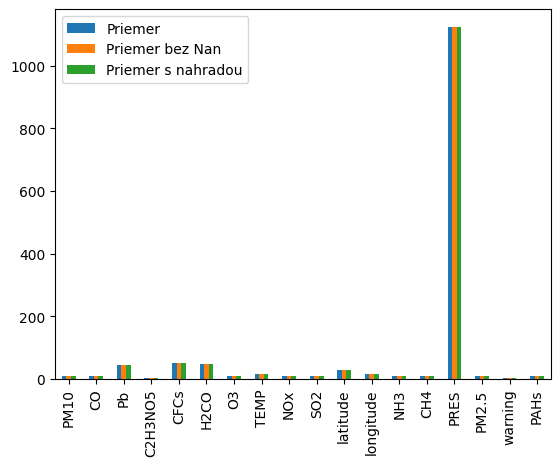

In [317]:
df2.plot.bar()

### 2. Nejednotné formáty dát
Vďaka vypísaniu unikátnych hodnôt sa nám podarilo determinovať nejednotné formáty dát.

Nechám si vypísať unikátne dáta. Podľa toho viem pozrieť, k akým odlišnostiam medzi dátami dochádza a s čím mam ďalej pracovať.

In [ ]:
for col in stations_data:
    print(stations_data[col].unique())
    print('\n')

- V datasete stations.csv sa jednalo v stĺpci QoS o duplikátny názvov pre stav ‘acceptable’, a to ‘accep‘ a ‘acceptable‘ a taktiež v rovnakom stĺpci sa nachádzal duplikáty názov pre stav ‘maintennance‘, a to ‘maitennce‘ a ‘maintennance‘. V oboch prípadoch boli hodnoty s chybou prepísané na gramaticky správne.

In [290]:
stations_data["QoS"] = np.where(stations_data["QoS"] == "accep", "acceptable", stations_data["QoS"])
stations_data["QoS"] = np.where(stations_data["QoS"] == "maitennce", "maintenance", stations_data["QoS"])

- Ďalej sa v tomto datasete nachádzali dátumy v stĺpci ‘revisions‘, ktoré boli zapísané v nejednotnom formáte. Všetky boli sformátované do podoby: mesiac slovom – deň – rok.
- Okrem toho ani dáta v stĺpcoch ’latitude‘ a ‘longitude‘ neboli v jednotnom tvare, preto boli všetky záznamy sformátované na čísla s 5 desatinnými miestami.

In [304]:
stations_data['revision'] = stations_data['revision'].apply(lambda x: pd.Timestamp(x).strftime('%B-%d-%Y'))

stations_data['latitude'] = stations_data['latitude'].round(5)
stations_data['longitude'] = stations_data['longitude'].round(5)

Dáta v measurements.csv sú síce všetky typu float, ale s nejednotnými počtami desatinných miest. Preto boli všetky sformátované na čísla s 5 desatinnými miestami, okrem stĺpca ‘warning’, ktorý bol sformatovaný na 1 desatinné miesto pre lepšiu čitateľnosť.

In [305]:
for col in reduced_data:
    reduced_data[col] = reduced_data[col].round(5)

reduced_data['warning'] = reduced_data['warning'].round(1)

### 3. Vychýlené hodnoty
- Problémom boli názvy miest zo stĺpca ‘station‘, z ktorých niektoré, hlavne tie preložené z kórejčiny a ruštiny boli v nekorektných formátoch, obsahujúcich znaky rôzne od písmen. Tieto názvy miest boli vyfiltrované a prepísané na korektný gramatický tvar v slovenskom jazyku.

Vyhľadám si názvy miest s inými znakmi ako písmenami

In [292]:
stations_data[stations_data['station'].str.contains('[^a-zA-Z" "]')]        # hladal som data s inymi znakmi ako pismeno

,QoS,station,code,latitude,longitude,revision
14,acceptable,Barmbek-Nord,DE,53.60520,10.03988,January-24-2015
74,average,Saint-Genis-Laval,FR,45.69558,4.79340,May-04-2013
115,good,Saint-Genis-Laval,FR,45.69558,4.79340,August-21-2014
116,maintenance,Jalal-Abad,KG,40.93333,73.00000,January-31-2017
124,average,Bar-le-Duc,FR,48.77275,5.16108,June-04-2018
148,acceptable,Marly-le-Roi,FR,48.86667,2.08333,August-02-2020
164,average,Port-Vila,VU,-17.73648,168.31366,July-15-2018
171,maintenance,Sar-e Pul,AF,36.21544,65.93249,December-03-2019
194,average,Montecchio Maggiore-Alte Ceccato,IT,45.50369,11.41200,January-19-2014
246,average,Dehiwala-Mount Lavinia,LK,6.84019,79.87116,December-30-2017


Prepíšem nepresné hodnoty na korektné.

In [293]:
stations_data["station"] = np.where(stations_data["station"] == "T‚Äôaebaek", "Taebaek", stations_data["station"]) # mesto v korei
stations_data["station"] = np.where(stations_data["station"] == "'Ali Sabieh", "Ali Sabieh", stations_data["station"]) # mesto v dzibutsku
stations_data["station"] = np.where(stations_data["station"] == "Oktyabr‚Äôskiy", "Oktyabrsk", stations_data["station"]) # mesto v rusku
stations_data["station"] = np.where(stations_data["station"] == "Roslavl‚Äô", "Roslavl", stations_data["station"]) # mesto v rusku
stations_data["station"] = np.where(stations_data["station"] == "Dyat‚Äôkovo", "Dyatkovo", stations_data["station"]) # mesto v rusku

### 4. Duplicitné dáta
Pomerne veľa duplicitných riadkov sa nachádzalo v datasete measurements.csv. V stations.csv sa nenachádzali žiadne. V prvom kroku riešenia tohto problému si nižšie vypíšem, či nejaké duplicitné riadky v datasete existujú.

In [319]:
dd = reduced_data[reduced_data.duplicated()]
dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PM10       0 non-null      float64
 1   CO         0 non-null      float64
 2   Pb         0 non-null      float64
 3   C2H3NO5    0 non-null      float64
 4   CFCs       0 non-null      float64
 5   H2CO       0 non-null      float64
 6   O3         0 non-null      float64
 7   TEMP       0 non-null      float64
 8   NOx        0 non-null      float64
 9   SO2        0 non-null      float64
 10  latitude   0 non-null      float64
 11  longitude  0 non-null      float64
 12  NH3        0 non-null      float64
 13  CH4        0 non-null      float64
 14  PRES       0 non-null      float64
 15  PM2.5      0 non-null      float64
 16  warning    0 non-null      float64
 17  PAHs       0 non-null      float64
dtypes: float64(18)
memory usage: 0.0 bytes


Zistil som, že existuje 165 riadkov. V ďalšom kroku odstránim duplikáty. I keď sa v druhom datasete nenachádzali žiadne, preistotu naň tiež zavolám funkciu na odstránenie duplikátov.

In [282]:
reduced_data.drop_duplicates(inplace=True)
stations_data.drop_duplicates(inplace=True)

Na grafe vidíme rozdiel v počte medzi dátami s duplikátmi a dátami bez nich.

<AxesSubplot: >

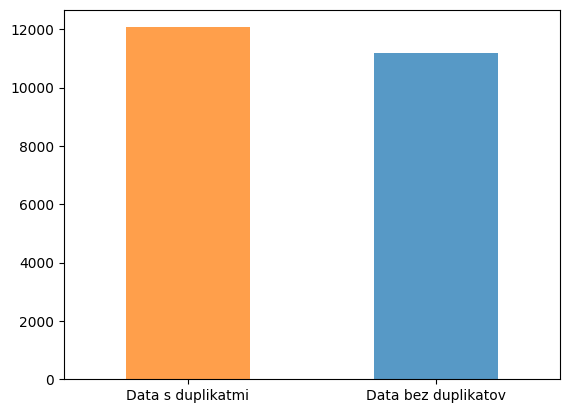

In [341]:
pd.Series([len(measurements_data.index), len(reduced_data.index)], index=['Data s duplikatmi', 'Data bez duplikatov']).plot(kind="bar",color=['C1','C0'], alpha=0.75, rot=0)

### Výsledky

Ukážky výstupov oboch datasetov po konečnom formátovaní dát.

In [306]:
reduced_data.head(30)

,PM10,CO,Pb,C2H3NO5,CFCs,H2CO,O3,TEMP,NOx,SO2,latitude,longitude,NH3,CH4,PRES,PM2.5,warning,PAHs
0,6.33846,6.61796,44.89247,0.22646,37.51693,39.50358,6.93304,18.26344,7.24953,8.60015,53.95278,32.86389,5.35805,6.00130,1136.95323,10.59506,1.0,9.24391
2,6.78253,7.32578,50.42226,0.27588,53.51533,61.03352,6.41183,13.61953,8.25103,8.93315,58.63667,59.80222,5.16975,5.07507,1148.76311,10.04912,1.0,8.73640
3,5.71508,9.26158,26.86094,0.18788,35.69230,57.17648,7.94233,16.76223,4.10062,4.44370,12.95629,78.27539,5.76106,7.01203,1089.36057,10.53430,1.0,8.67231
4,9.16375,7.12481,48.82457,1.32986,32.22006,46.82387,11.63958,12.48813,6.26932,7.81736,32.54044,-82.90375,5.96896,8.44913,1099.39295,9.40919,0.0,4.80834
5,7.04390,7.96828,56.56011,0.31311,56.18221,41.18541,10.42120,12.74538,8.75889,7.43447,37.73604,-120.93549,8.58263,6.89506,1050.67737,7.20484,0.0,6.00215
6,8.07997,6.40977,58.46766,0.67969,60.60543,34.99728,9.14442,22.17319,6.75870,8.48118,3.51667,11.50000,7.64965,8.33486,1107.84036,8.70999,0.0,6.88903
7,7.29130,7.98165,51.66434,0.32651,58.74764,34.19093,8.08972,2.44131,8.52918,7.19837,34.09668,-117.71978,9.57044,9.39463,1151.83879,6.68114,1.0,6.25543
8,8.35517,6.93280,19.34860,0.81349,55.69528,41.58524,9.23259,2.99513,7.51361,5.92541,10.20898,123.75800,5.64815,8.15221,1121.79391,8.18714,0.0,4.12422
9,8.13981,7.40637,61.53701,0.61849,47.76755,61.36477,10.36692,13.31374,7.97743,7.96606,4.02219,101.02083,9.85029,7.40917,1157.28796,8.65797,1.0,7.83400
10,10.08968,6.88791,37.89372,3.02777,36.54980,32.98070,10.37013,23.01118,9.14681,7.64110,22.75218,72.68533,8.80552,4.32548,1085.64050,10.18344,1.0,11.72607


In [299]:
stations_data.head(30)

,QoS,station,code,latitude,longitude,revision
0,good,Casa Blanca,MX,19.04222,-98.11889,November-27-2019
1,building,Mikhaylovka,RU,50.06000,43.23790,July-26-2017
2,building,Shahre Jadide Andisheh,IR,35.68030,51.01930,June-01-2013
3,building,Aracaju,BR,-10.91111,-37.07167,December-29-2012
4,maintenance,Parola,IN,20.88098,75.11937,July-05-2019
5,excellent,Kheda,IN,22.75218,72.68533,October-29-2014
6,maintenance,Caldas Novas,BR,-17.74431,-48.62789,August-02-2022
7,good,Freetown,SL,8.48714,-13.23560,October-25-2021
8,excellent,Frankston South,AU,-38.16604,145.13643,February-27-2022
9,average,Gorakhpur,IN,26.76628,83.36889,March-12-2021


Ďalším výstupom si dokážeme, že dáta v oboch datasetoch sú potrebného typu.

In [303]:
reduced_data.dtypes

PM10         float64
CO           float64
Pb           float64
C2H3NO5      float64
CFCs         float64
H2CO         float64
O3           float64
TEMP         float64
NOx          float64
SO2          float64
latitude     float64
longitude    float64
NH3          float64
CH4          float64
PRES         float64
PM2.5        float64
warning      float64
PAHs         float64
dtype: object

In [307]:
stations_data.dtypes

QoS           object
station       object
code          object
latitude     float64
longitude    float64
revision      object
dtype: object